<a href="https://colab.research.google.com/github/cosshoon/Anomaly-Detection-/blob/main/FFT%EC%99%80_DWT%EB%A1%9C_IMS_dataset_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 베어링 데이터셋 불러오기

In [ ]:
from google.colab import drive
drive.mount('/g')

Drive already mounted at /g; to attempt to forcibly remount, call drive.mount("/g", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline


from numpy.random import seed
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# set random seed
seed(10)
tf.random.set_seed(10)

In [ ]:
# load, average and merge sensor samples
data_dir = "/g/MyDrive/Machine Learning/SK fellowship/Dataset/IMS dataset/2nd_test"
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
    dataset_mean_abs.index = [filename]
    merged_data = merged_data.append(dataset_mean_abs)
    
merged_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']

In [ ]:
!# transform data file index to datetime and sort in chronological order
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()
merged_data.to_csv('Averaged_BearingTest_Dataset_2nd.csv', encoding='cp949')
print("Dataset shape:", merged_data.shape)
merged_data.head()

Dataset shape: (984, 4)


,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


In [ ]:
!ls

Averaged_BearingTest_Dataset_2nd.csv  test_data_fft.csv
sample_data			      train_data_fft.csv


In [ ]:
train = merged_data['2004-02-12 10:52:39': '2004-02-15 12:52:39']
test = merged_data['2004-02-15 12:52:39':]
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Training dataset shape: (445, 4)
Test dataset shape: (538, 4)


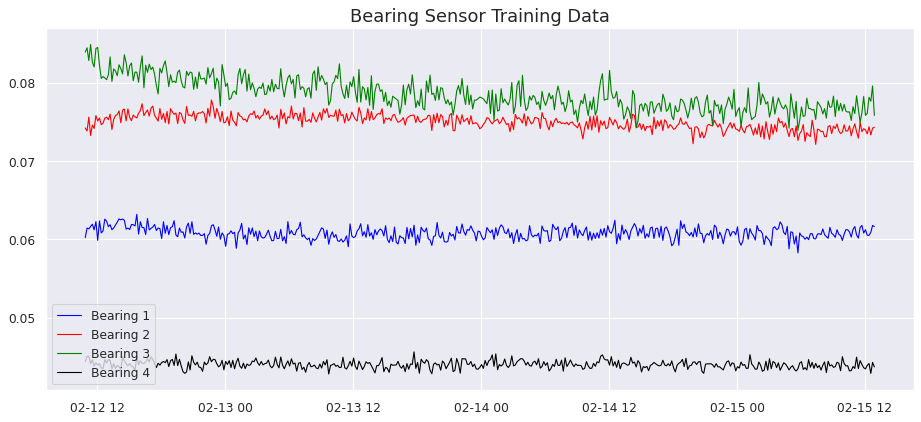

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train['Bearing 1'], label='Bearing 1', color='blue', animated = True, linewidth=1)
ax.plot(train['Bearing 2'], label='Bearing 2', color='red', animated = True, linewidth=1)
ax.plot(train['Bearing 3'], label='Bearing 3', color='green', animated = True, linewidth=1)
ax.plot(train['Bearing 4'], label='Bearing 4', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Bearing Sensor Training Data', fontsize=16)
plt.show()


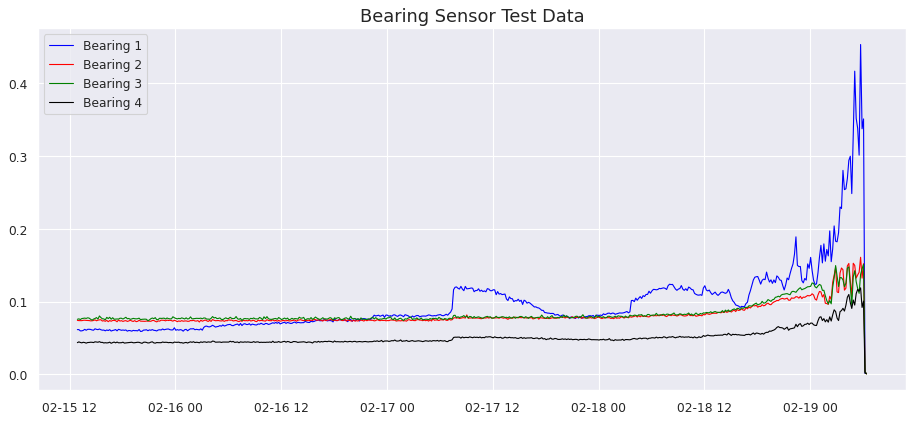

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(test['Bearing 1'], label='Bearing 1', color='blue', animated = True, linewidth=1)
ax.plot(test['Bearing 2'], label='Bearing 2', color='red', animated = True, linewidth=1)
ax.plot(test['Bearing 3'], label='Bearing 3', color='green', animated = True, linewidth=1)
ax.plot(test['Bearing 4'], label='Bearing 4', color='black', animated = True, linewidth=1)
plt.legend(loc='upper left')
ax.set_title('Bearing Sensor Test Data', fontsize=16)
plt.show()

# **FFT 로 데이터 전처리**

In [ ]:
# transforming data from the time domain to the frequency domain using fast Fourier transform
train_fft = np.fft.fft(train)
test_fft = np.fft.fft(test)

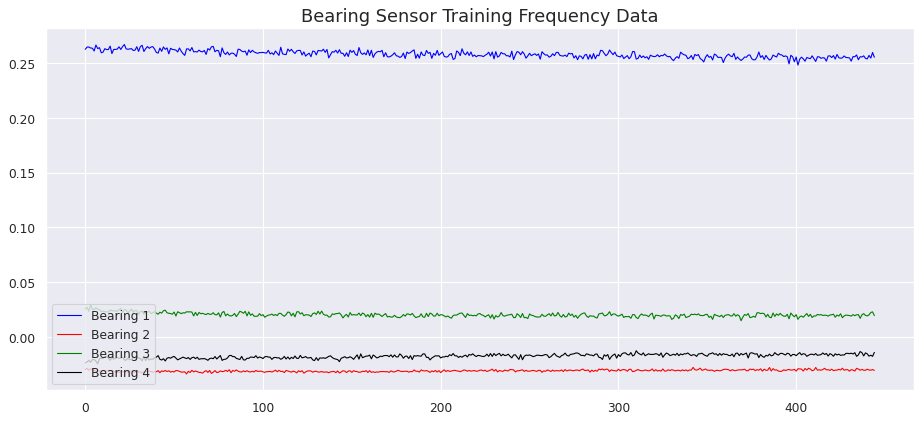

In [ ]:
# frequencies of the healthy sensor signal
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train_fft[:,0].real, label='Bearing 1', color='blue', animated = True, linewidth=1)
ax.plot(train_fft[:,1].imag, label='Bearing 2', color='red', animated = True, linewidth=1)
ax.plot(train_fft[:,2].real, label='Bearing 3', color='green', animated = True, linewidth=1)
ax.plot(train_fft[:,3].real, label='Bearing 4', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Bearing Sensor Training Frequency Data', fontsize=16)
plt.show()

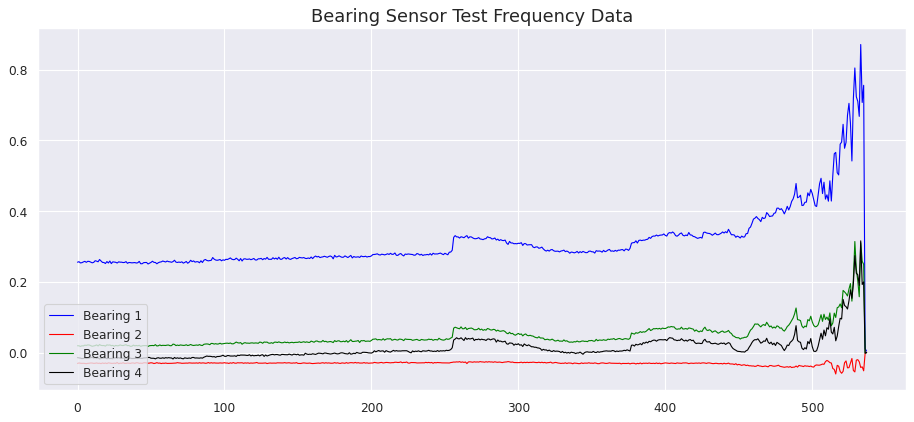

In [ ]:
# frequencies of the degrading sensor signal
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(test_fft[:,0].real, label='Bearing 1', color='blue', animated = True, linewidth=1)
ax.plot(test_fft[:,1].imag, label='Bearing 2', color='red', animated = True, linewidth=1)
ax.plot(test_fft[:,2].real, label='Bearing 3', color='green', animated = True, linewidth=1)
ax.plot(test_fft[:,3].real, label='Bearing 4', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Bearing Sensor Test Frequency Data', fontsize=16)
plt.show()

In [ ]:
train_data_fft = pd.DataFrame(train_fft)

train_data_fft.to_csv('train_data_fft.csv', encoding='cp949', index= False)

test_data_fft = pd.DataFrame(test_fft)

test_data_fft.to_csv('test_data_fft.csv', encoding='cp949', index= False)

In [ ]:
!ls

Averaged_BearingTest_Dataset_2nd.csv  test_data_fft.csv
sample_data			      train_data_fft.csv


# DWT로 전처리 시도

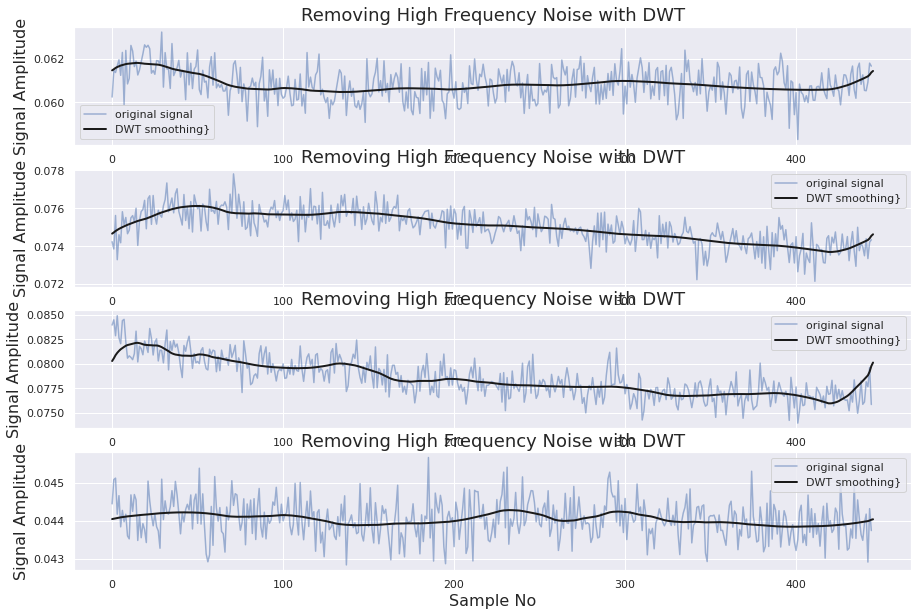

In [ ]:
import pywt

def lowpassfilter(signal, thresh = 0.63, wavelet="db4"):
    thresh = thresh*np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal

fig, axes = plt.subplots(4,1,figsize = (15,10))
ax = axes.flatten()

signal = train['Bearing 1'].values
ax[0].plot(signal, color="b", alpha=0.5, label='original signal')
rec = lowpassfilter(signal, 0.4)
ax[0].plot(rec, 'k', label='DWT smoothing}', linewidth=2)
ax[0].legend()
ax[0].set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax[0].set_ylabel('Signal Amplitude', fontsize=16)
ax[0].set_xlabel('Sample No', fontsize=16)

signal = train['Bearing 2'].values
ax[1].plot(signal, color="b", alpha=0.5, label='original signal')
rec = lowpassfilter(signal, 0.4)
ax[1].plot(rec, 'k', label='DWT smoothing}', linewidth=2)
ax[1].legend()
ax[1].set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax[1].set_ylabel('Signal Amplitude', fontsize=16)
ax[1].set_xlabel('Sample No', fontsize=16)

signal = train['Bearing 3'].values
ax[2].plot(signal, color="b", alpha=0.5, label='original signal')
rec = lowpassfilter(signal, 0.4)
ax[2].plot(rec, 'k', label='DWT smoothing}', linewidth=2)
ax[2].legend()
ax[2].set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax[2].set_ylabel('Signal Amplitude', fontsize=16)
ax[2].set_xlabel('Sample No', fontsize=16)

signal = train['Bearing 4'].values
ax[3].plot(signal, color="b", alpha=0.5, label='original signal')
rec = lowpassfilter(signal, 0.4)
ax[3].plot(rec, 'k', label='DWT smoothing}', linewidth=2)
ax[3].legend()
ax[3].set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax[3].set_ylabel('Signal Amplitude', fontsize=16)
ax[3].set_xlabel('Sample No', fontsize=16)

plt.show()

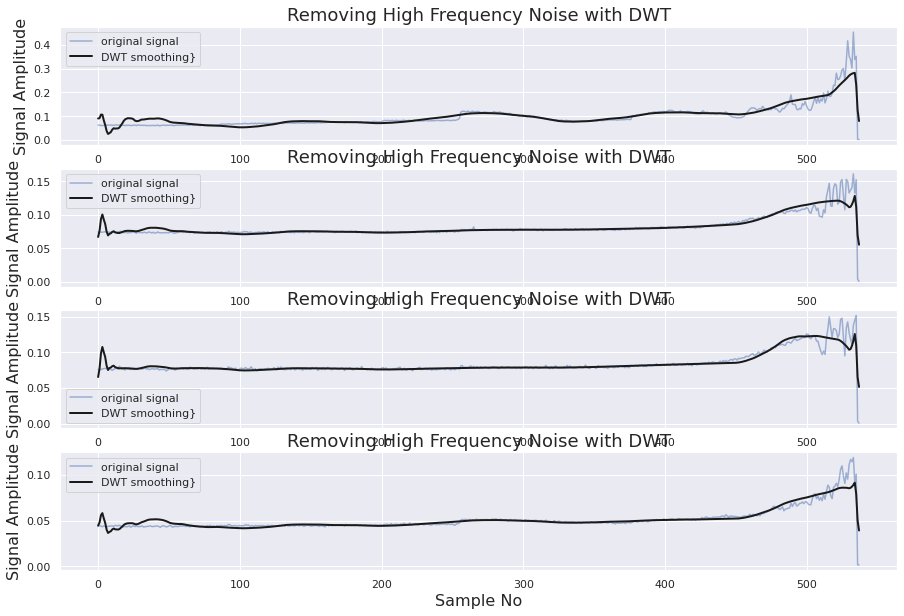

In [ ]:
def lowpassfilter(signal, thresh = 0.63, wavelet="db4"):
    thresh = thresh*np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal

fig, axes = plt.subplots(4,1,figsize = (15,10))
ax = axes.flatten()

signal = test['Bearing 1'].values
ax[0].plot(signal, color="b", alpha=0.5, label='original signal')
rec = lowpassfilter(signal, 0.4)
ax[0].plot(rec, 'k', label='DWT smoothing}', linewidth=2)
ax[0].legend()
ax[0].set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax[0].set_ylabel('Signal Amplitude', fontsize=16)
ax[0].set_xlabel('Sample No', fontsize=16)

signal = test['Bearing 2'].values
ax[1].plot(signal, color="b", alpha=0.5, label='original signal')
rec = lowpassfilter(signal, 0.4)
ax[1].plot(rec, 'k', label='DWT smoothing}', linewidth=2)
ax[1].legend()
ax[1].set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax[1].set_ylabel('Signal Amplitude', fontsize=16)
ax[1].set_xlabel('Sample No', fontsize=16)

signal = test['Bearing 3'].values
ax[2].plot(signal, color="b", alpha=0.5, label='original signal')
rec = lowpassfilter(signal, 0.4)
ax[2].plot(rec, 'k', label='DWT smoothing}', linewidth=2)
ax[2].legend()
ax[2].set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax[2].set_ylabel('Signal Amplitude', fontsize=16)
ax[2].set_xlabel('Sample No', fontsize=16)

signal = test['Bearing 4'].values
ax[3].plot(signal, color="b", alpha=0.5, label='original signal')
rec = lowpassfilter(signal, 0.4)
ax[3].plot(rec, 'k', label='DWT smoothing}', linewidth=2)
ax[3].legend()
ax[3].set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax[3].set_ylabel('Signal Amplitude', fontsize=16)
ax[3].set_xlabel('Sample No', fontsize=16)

plt.show()